# Numerai Prediction with Deep Learning - Model B

## Import relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from numpy.random import seed
from sklearn.preprocessing import StandardScaler

## Load data

In [2]:
train_data = pd.read_csv('/Users/vitawat/Documents/Python/Numerai/numerai_training_data.csv')
tournament_data = pd.read_csv('/Users/vitawat/Documents/Python/Numerai/numerai_tournament_data.csv')
validation_data = tournament_data[tournament_data['data_type'] == 'validation' ]

## Preprocessing data

In [3]:
train_data['target_label'] = train_data['target_kazutsugi'].map({0.00:0, 0.25:1, 0.5:2, 0.75:3, 1.00:4})
validation_data['target_label'] = validation_data['target_kazutsugi'].map({0.00:0, 0.25:1, 0.5:2, 0.75:3, 1.00:4})

/Users/vitawat/anaconda2/envs/py3-TF2.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
train_targets, train_inputs = np.array(train_data['target_label']),np.array(train_data.iloc[:,3:313])
validation_targets, validation_inputs = np.array(validation_data['target_label']), np.array(validation_data.iloc[:,3:313])

## Model

In [71]:
# need to run with the same results, set seed
seed(1)
tf.random.set_seed(1)

input_size = 310
output_size = 5
hidden_layer_size = 400
NUM_EPOCHS = 250
BATCH_SIZE = 32
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                            tf.keras.layers.Dense(output_size,activation='softmax')
                            ])

optimizer = tf.keras.optimizers.SGD(lr = 0.0001)
model.compile(optimizer = optimizer ,loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_inputs,train_targets,
          batch_size = BATCH_SIZE,
          epochs = NUM_EPOCHS,
          callbacks = [early_stopping],
          validation_data = (validation_inputs, validation_targets),
          verbose = 2)

Train on 501808 samples, validate on 56261 samples
Epoch 1/250
501808/501808 - 61s - loss: 1.6097 - accuracy: 0.2208 - val_loss: 1.5979 - val_accuracy: 0.2360
Epoch 2/250
501808/501808 - 62s - loss: 1.5965 - accuracy: 0.2331 - val_loss: 1.5897 - val_accuracy: 0.2415
Epoch 3/250
501808/501808 - 61s - loss: 1.5907 - accuracy: 0.2382 - val_loss: 1.5853 - val_accuracy: 0.2436
Epoch 4/250
501808/501808 - 61s - loss: 1.5873 - accuracy: 0.2417 - val_loss: 1.5825 - val_accuracy: 0.2452
Epoch 5/250
501808/501808 - 60s - loss: 1.5849 - accuracy: 0.2441 - val_loss: 1.5805 - val_accuracy: 0.2468
Epoch 6/250
501808/501808 - 61s - loss: 1.5831 - accuracy: 0.2458 - val_loss: 1.5790 - val_accuracy: 0.2489
Epoch 7/250
501808/501808 - 69s - loss: 1.5818 - accuracy: 0.2473 - val_loss: 1.5778 - val_accuracy: 0.2491
Epoch 8/250
501808/501808 - 64s - loss: 1.5806 - accuracy: 0.2484 - val_loss: 1.5769 - val_accuracy: 0.2508
Epoch 9/250
501808/501808 - 63s - loss: 1.5798 - accuracy: 0.2496 - val_loss: 1.5761 

Epoch 76/250
501808/501808 - 75s - loss: 1.5697 - accuracy: 0.2631 - val_loss: 1.5689 - val_accuracy: 0.2591
Epoch 77/250
501808/501808 - 75s - loss: 1.5696 - accuracy: 0.2632 - val_loss: 1.5689 - val_accuracy: 0.2586
Epoch 78/250
501808/501808 - 71s - loss: 1.5696 - accuracy: 0.2632 - val_loss: 1.5688 - val_accuracy: 0.2589
Epoch 79/250
501808/501808 - 71s - loss: 1.5695 - accuracy: 0.2634 - val_loss: 1.5688 - val_accuracy: 0.2584
Epoch 80/250
501808/501808 - 67s - loss: 1.5695 - accuracy: 0.2632 - val_loss: 1.5688 - val_accuracy: 0.2585
Epoch 81/250
501808/501808 - 71s - loss: 1.5694 - accuracy: 0.2634 - val_loss: 1.5688 - val_accuracy: 0.2592
Epoch 82/250
501808/501808 - 71s - loss: 1.5694 - accuracy: 0.2638 - val_loss: 1.5688 - val_accuracy: 0.2592
Epoch 83/250
501808/501808 - 79s - loss: 1.5693 - accuracy: 0.2638 - val_loss: 1.5688 - val_accuracy: 0.2588
Epoch 84/250
501808/501808 - 78s - loss: 1.5693 - accuracy: 0.2639 - val_loss: 1.5688 - val_accuracy: 0.2588


### Numerai score on train data 

In [72]:
def numerai_score(y_true, y_pred):
    rank_pred = y_pred.rank(pct = True, method = "first")
    return np.corrcoef(y_true, rank_pred)[0,1]

In [73]:
pred = model.predict(train_inputs)

train_data_pred = train_data.copy()
train_data_pred['prob 00'] =  pred[:,0]
train_data_pred['prob 25'] =  pred[:,1]
train_data_pred['prob 50'] =  pred[:,2]
train_data_pred['prob 75'] =  pred[:,3]
train_data_pred['prob 100'] =  pred[:,4]

train_data_pred['predicted'] = (train_data_pred['prob 00']*0 + 
                               train_data_pred['prob 25']*0.25 +
                               train_data_pred['prob 50']*0.50 +
                               train_data_pred['prob 75']*0.75 +
                               train_data_pred['prob 100']*1.00)

print ('numerai score on train data : ' ,
       round(numerai_score(train_data_pred['target_kazutsugi'], train_data_pred['predicted']),5))

numerai score on train data :  0.05906


### Numerai score on validation data

In [74]:
pred = model.predict(validation_inputs)

validation_data_pred = validation_data.copy()
validation_data_pred['prob 00'] =  pred[:,0]
validation_data_pred['prob 25'] =  pred[:,1]
validation_data_pred['prob 50'] =  pred[:,2]
validation_data_pred['prob 75'] =  pred[:,3]
validation_data_pred['prob 100'] =  pred[:,4]

validation_data_pred['predicted'] = (validation_data_pred['prob 00']*0 + 
                               validation_data_pred['prob 25']*0.25 +
                               validation_data_pred['prob 50']*0.50 +
                               validation_data_pred['prob 75']*0.75 +
                               validation_data_pred['prob 100']*1.00)

print ('numerai score on validation data : ' ,
       round(numerai_score(validation_data_pred['target_kazutsugi'], validation_data_pred['predicted']),5))

numerai score on validation data :  0.03154


### Correlation and consistency on validation data

In [75]:
consistant = 0
corr = []
era = []
for i in validation_data_pred['era'].unique() :
    data = validation_data_pred[validation_data_pred['era'] == i]
    score = round(numerai_score(data['target_kazutsugi'],data['predicted']),5)
    if score > 0 :
        consistant = consistant + 1
    else :
        consistant = consistant  
    
    era.append(i)
    corr.append(score)
    
correlation_table = pd.DataFrame(data = [corr], columns = era)
mean = correlation_table.mean(axis = 1)
sd = correlation_table.std(axis = 1)
correlation_table['Mean'] = mean
correlation_table['SD'] = sd


## Result

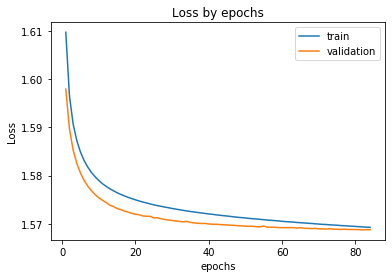

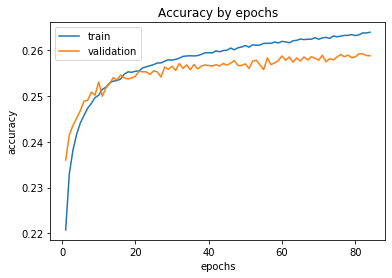

numerai score on train data :  0.05906
numerai score on validation data :  0.03154
Consistant :  1.0
Summary on validation data by era


,era121,era122,era123,era124,era125,era126,era127,era128,era129,era130,era131,era132,Mean,SD
0,0.0154,0.02583,0.04217,0.03596,0.03109,0.01715,0.00599,0.05887,0.01215,0.02654,0.03117,0.07527,0.031466,0.019877


In [89]:
loss = model.history.history['loss']
accuracy = model.history.history['accuracy']
val_loss = model.history.history['val_loss']
val_accuracy = model.history.history['val_accuracy']
plt.plot(range(1,len(loss)+1), loss, label = 'train')
plt.plot(range(1,len(loss)+1), val_loss, label = 'validation')
plt.title('Loss by epochs')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(1,len(loss)+1), accuracy, label = 'train')
plt.plot(range(1,len(loss)+1), val_accuracy, label = 'validation')
plt.title('Accuracy by epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

print ('numerai score on train data : ' ,
       round(numerai_score(train_data_pred['target_kazutsugi'], train_data_pred['predicted']),5))

print ('numerai score on validation data : ' ,
       round(numerai_score(validation_data_pred['target_kazutsugi'], validation_data_pred['predicted']),5))

print ('Consistant : ', round(consistant/12,5))
print ('Summary on validation data by era')

correlation_table



## Save Selected Model

In [78]:
model.save('model_B')      # Now model saved in the name of model_B

INFO:tensorflow:Assets written to: model_B/assets


## Finish model building........and start to predict with tournament data

## Predicting

#### 1) Import relevant libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from numpy.random import seed
from sklearn.preprocessing import StandardScaler

#### 2) Load tournament data

In [2]:
tournament_data = pd.read_csv('/Users/vitawat/Documents/Python/Numerai/numerai_tournament_data.csv')

#### 3} Preprocessing

In [3]:
tournament_data['target_label'] = np.nan
tournament_targets, tournament_inputs = np.array(tournament_data['target_label']),np.array(tournament_data.iloc[:,3:313])

#### 4)  Load Model

In [4]:
model_B = tf.keras.models.load_model('model_B')

#### 5) Predict

In [5]:
pred = model_B.predict(tournament_inputs)

tournament_data_pred = tournament_data.copy()
tournament_data_pred['prob 00'] =  pred[:,0]
tournament_data_pred['prob 25'] =  pred[:,1]
tournament_data_pred['prob 50'] =  pred[:,2]
tournament_data_pred['prob 75'] =  pred[:,3]
tournament_data_pred['prob 100'] =  pred[:,4]

tournament_data_pred['predicted'] = (tournament_data_pred['prob 00']*0 + 
                               tournament_data_pred['prob 25']*0.25 +
                               tournament_data_pred['prob 50']*0.50 +
                               tournament_data_pred['prob 75']*0.75 +
                               tournament_data_pred['prob 100']*1.00)


#### 6) Make submission

In [6]:
submission = pd.DataFrame(tournament_data_pred['id'])
submission['prediction_kazutsugi'] = tournament_data_pred['predicted']
submission

,id,prediction_kazutsugi
0,n0003aa52cab36c2,0.488471
1,n000920ed083903f,0.462299
2,n0038e640522c4a6,0.571928
3,n004ac94a87dc54b,0.514884
4,n0052fe97ea0c05f,0.510336
...,...,...
1676026,nffbb4995cb07742,0.471586
1676027,nffbf96bdd6b3ee3,0.512404
1676028,nffcce807fb53a41,0.510606
1676029,nffd0e48b79bfe80,0.522273


#### 7) Save submission

In [7]:
submission.to_csv('submission_model_B.csv', index = False)